This notebook will assist in creating and testing a general purpose function that will be in slp_package.slp_functions that will create a training dataset given some parameters.

In [1]:
import os
import sys
import gzip

import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

import tqdm
from joblib import Parallel, delayed
from multiprocessing import Manager

sys.path.append('..')
from slp_package.input_dataset import InputDataSet
from slp_package.slp_functions import create_merged_game_data_df, prepare_data_for_training

import matplotlib.pyplot as plt


In [2]:
df = create_merged_game_data_df(['public','ranked','mango'])
df.columns
df['lras_initiator'].value_counts()

1.0    8805
0.0    8083
3.0    1723
2.0    1299
Name: lras_initiator, dtype: int64

In [3]:
# Example usage
source_data = ['ranked', 'public', 'mango']

general_features = {
    'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
    'num_players': [2],
    'conclusive': [True]
}
player_features = {
    # 'netplay_code': ['MANG#0'],
    # 'character_name': ['FOX', 'FALCO', 'MARTH', 'CAPTAIN_FALCON', 'SHEIK', 'PEACH', 'JIGGLYPUFF']
    
}
opposing_player_features = {
    # 'character_name': ['MARTH'],
    # 'netplay_code': ['KOD#0', 'ZAIN#0']
}
label_info = {
    'source': ['general'], # Can be 'general', 'player
    # 'feature': ['netplay_code']
    'feature': ['length']
}
    
df = prepare_data_for_training(source_data, general_features, player_features, opposing_player_features, label_info)


/workspace/slp_jaspar/extract_all_data/../slp_package/slp_functions.py:107: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  processed_df = pd.concat([player_1_df, player_2_df], ignore_index=True)


In [4]:
(df['length'] / 60 ** 2).describe()

count    409260.000000
mean          2.759175
std           0.801034
min           0.011944
25%           2.221111
50%           2.690556
75%           3.215833
max           8.000278
Name: length, dtype: float64

In [26]:
df.head()
path = 'mango/FALCO/e55c959c-533d-4b0e-82b1-4e79decd25e2.npy.gz'

with gzip.open('/workspace/melee_project_data/input_np/' + path) as f:
    inputs = np.load(f)

uniques = np.unique(inputs[0])
# print(uniques)
# print(uniques.shape)
# print(np.diff(uniques))

analog_transformed = np.copy(inputs[0])
analog_transformed[analog_transformed > 0] -= 0.2875 + 0.0125
analog_transformed[analog_transformed < 0] += 0.2875 - 0.0125
analog_transformed *= .5 / .725
analog_transformed += .5

print(.0125 * (.5 / .725))
uniques = np.unique(analog_transformed)
# print(uniques.shape)
# print(uniques)
print(np.diff(uniques))

0.008620689655172415
[0.00862071 0.00862062 0.00862074 0.00862071 0.00862065 0.00862071
 0.00862065 0.00862071 0.00862074 0.00862065 0.00862071 0.00862065
 0.00862071 0.00862074 0.00862062 0.00862074 0.00862065 0.00862074
 0.00862068 0.00862068 0.00862068 0.00862068 0.00862071 0.00862071
 0.00862068 0.00862068 0.00862068 0.00862071 0.00862068 0.00862068
 0.00862068 0.00862068 0.00862074 0.00862068 0.00862068 0.00862068
 0.00862068 0.00862074 0.00862068 0.00862068 0.00862068 0.00862068
 0.00862071 0.00862071 0.00862068 0.00862068 0.00862068 0.00862068
 0.00862071 0.00862068 0.00862068 0.00862071 0.00862068 0.00862071
 0.00862068 0.00862068 0.00862071 0.00862068 0.00862068 0.00862068
 0.00862068 0.00862068 0.00862074 0.00862068 0.00862068 0.00862068
 0.00862068 0.00862074 0.00862068 0.00862068 0.00862068 0.00862068
 0.00862074 0.00862068 0.00862068 0.00862068 0.00862068 0.00862074
 0.00862062 0.00862074 0.00862062 0.00862074 0.00862074 0.00862062
 0.00862074 0.00862062 0.00862074 0.00862

[ 4240  5606  5754 ...  9957 10538 10615]


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.2000e+01, 2.9000e+01,
        2.0000e+01, 2.5000e+01, 2.7000e+01, 4.0000e+01, 8.9000e+01,
        2.2400e+02, 7.2400e+02, 1.9240e+03, 5.1590e+03, 1.4787e+04,
        3.2985e+04, 5.0923e+04, 4.3479e+04, 1.9648e+04, 5.2380e+03,
        9.8800e+02, 1.6200e+02]),
 array([ 5.42626509,  5.71962027,  6.01297545,  6.30633064,  6.59968582,
         6.893041  ,  7.18639618,  7.47975136,  7.77310654,  8.06646173,
         8.35981691,  8.65317209,  8.94652727,  9.23988245,  9.53323763,
         9.82659282, 10.119948  , 10.41330318, 10.70665836, 11.00001354,
        11.29336872, 11.5867239 , 11.88007909, 12.17343427, 12.46678945,
        12.76014463, 13.05349981, 13.34685499, 13.64021018, 13.93356536,
        14.22692054, 14.52027572, 14.8136309 ]),
 <BarContainer object of 32 artists>)

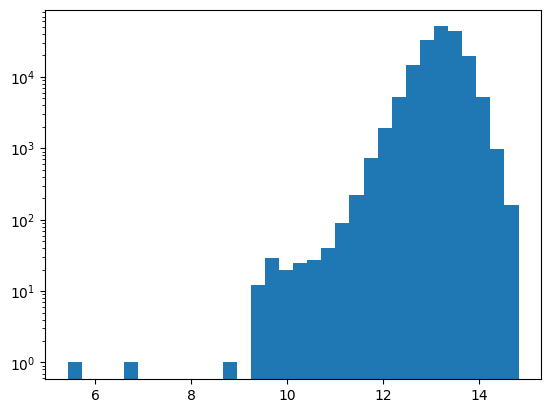

In [5]:
lengths = df['length'].to_numpy()
np.sort(lengths)
lengths = lengths[:np.argmax(lengths > 60 ** 2 * 8)]
print(lengths)
log_lenghts = np.log2(lengths + .00001)
bins = 32
counts, bins = np.histogram(log_lenghts, bins = bins)
plt.hist(bins[:-1], bins, weights=counts, log = True)


In [14]:
plt.hist

<function matplotlib.pyplot.hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'>

In [15]:
print(df.columns)

Index(['stage_name', 'num_players', 'conclusive', 'player_inputs_np_save_path',
       'length', 'labels'],
      dtype='object')


In [16]:
print(df.dtypes)

stage_name                    object
num_players                    int64
conclusive                    object
player_inputs_np_save_path    object
length                         int64
labels                         int64
dtype: object


In [17]:
df['stage_name'].value_counts()

BATTLEFIELD           131748
YOSHIS_STORY           89426
POKEMON_STADIUM        79372
FOUNTAIN_OF_DREAMS     59058
FINAL_DESTINATION      49656
Name: stage_name, dtype: int64

In [18]:
# def apply_general_filters(df, filters):
#     """
#     Applies filters to the dataframe based on the provided dictionary of filters.

#     :param df: The pandas DataFrame to filter.
#     :param filters: Dictionary of column names and their desired values.
#     :return: The filtered DataFrame.
#     """
#     for feature, values in filters.items():
#         if isinstance(values, list):
#             df = df[df[feature].isin(values)]
#         else:
#             df = df[df[feature] == values]
#     return df

# def identify_and_label_players(df, player_features, opposing_player_features):
#     """
#     Identifies which player (player_1 or player_2) matches the specified features and renames columns accordingly,
#     also considering the opposing player features.

#     :param df: The merged DataFrame.
#     :param player_features: Dictionary of features for the player we are training on.
#     :param opposing_player_features: Dictionary of features for the opposing player.
#     :return: DataFrame with columns renamed for player and opposing player features, including input paths.
#     """
#     # Reset the index of the DataFrame to ensure alignment
#     df = df.reset_index(drop=True)

#     # Initialize masks for player 1 and player 2
#     player_1_mask = pd.Series([True] * len(df))
#     player_2_mask = pd.Series([True] * len(df))

#     # Update masks for player features
#     for feature, values in player_features.items():
#         player_1_mask &= df[f'player_1_{feature}'].isin(values) if isinstance(values, list) else df[f'player_1_{feature}'] == values
#         player_2_mask &= df[f'player_2_{feature}'].isin(values) if isinstance(values, list) else df[f'player_2_{feature}'] == values

#     # Update masks for opposing player features
#     for feature, values in opposing_player_features.items():
#         player_1_mask &= df[f'player_2_{feature}'].isin(values) if isinstance(values, list) else df[f'player_2_{feature}'] == values
#         player_2_mask &= df[f'player_1_{feature}'].isin(values) if isinstance(values, list) else df[f'player_1_{feature}'] == values

#     # Apply the masks to filter the DataFrame
#     player_1_df = df[player_1_mask]
#     player_2_df = df[player_2_mask]

#     # Rename columns for player_1 and player_2 in their respective DataFrames
#     player_1_df = player_1_df.rename(columns=lambda col: col.replace('player_1_', 'player_') if 'player_1_' in col else col.replace('player_2_', 'opposing_player_'))
#     player_2_df = player_2_df.rename(columns=lambda col: col.replace('player_2_', 'player_') if 'player_2_' in col else col.replace('player_1_', 'opposing_player_'))

#     # Concatenate the two DataFrames
#     processed_df = pd.concat([player_1_df, player_2_df], ignore_index=True)

#     return processed_df



# def extract_label(df, label_info):
#     """
#     Extracts the label column from the dataframe based on label_info and renames it to 'label'.

#     :param df: The DataFrame to extract the label from.
#     :param label_info: Dictionary specifying the source and feature name for the label.
#     :return: DataFrame with the label column extracted and renamed to 'label'.
#     """
#     label_source = label_info['source'][0]  # Assuming label_source is passed as a list
#     label_feature = label_info['feature'][0]  # Assuming label_feature is passed as a list

#     # Construct the full column name based on the source
#     if label_source == 'player':
#         label_column = f'player_{label_feature}'
#     elif label_source == 'opposing_player':
#         label_column = f'opposing_player_{label_feature}'
#     else:
#         label_column = label_feature

#     # Check if the column exists after renaming
#     if label_column not in df.columns:
#         raise KeyError(f"{label_column} not found in the DataFrame columns")
    
#     df['label'] = df[label_column]
#     return df



# def prepare_data_for_training(source_data, general_features, player_features, opposing_player_features, label_info):
#     """
#     Prepares data for training based on specified features and filters.

#     :param source_data: List of sources to include in the data merge.
#     :param general_features: Dictionary of general game features and their desired values.
#     :param player_features: Dictionary of features for the player we are training on.
#     :param opposing_player_features: Dictionary of features for the opposing player.
#     :param label_info: Dictionary specifying the source and feature name for the label.
#     :return: A pandas DataFrame with the prepared training data, containing only specified features and the label.
#     """
#     # Merge data from specified sources
#     merged_df = create_merged_game_data_df(source_data)

#     # Apply filters to general game data
#     merged_df = apply_general_filters(merged_df, general_features)

#     # Identify and label player and opposing player features
#     merged_df = identify_and_label_players(merged_df, player_features, opposing_player_features)

#     # Extract and set the label for training
#     merged_df = extract_label(merged_df, label_info)

#     # Define the order of columns to be selected
#     general_feature_columns = list(general_features.keys())
#     player_feature_columns = [f'player_{feature}' for feature in player_features.keys()]
#     opposing_player_feature_columns = [f'opposing_player_{feature}' for feature in opposing_player_features.keys()]
#     input_path_column = ['player_inputs_np_save_path']
#     label_column = ['label']

#     # Combine all columns in the desired order
#     final_columns = general_feature_columns + player_feature_columns + opposing_player_feature_columns + input_path_column + label_column

#     # Select only the specified columns from the DataFrame
#     final_df = merged_df[final_columns]

#     return final_df




In [19]:
# Example usage
source_data = ['ranked', 'public']

general_features = {
    'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
    'num_players': [2],
    'conclusive': [True]
}
player_features = {
    # 'netplay_code': ['MANG#0'],
    'character_name': ['FOX', 'FALCO', 'MARTH', 'CAPTAIN_FALCON', 'SHEIK', 'PEACH', 'JIGGLYPUFF']
    
}
opposing_player_features = {
    # 'character_name': ['MARTH'],
    # 'netplay_code': ['KOD#0', 'ZAIN#0']
}
label_info = {
    'source': ['player'], # Can be 'general', 'player
    # 'feature': ['netplay_code']
    'feature': ['character_name']
}
    
processed_df = prepare_data_for_training(source_data, general_features, player_features, opposing_player_features, label_info)


/workspace/slp_jaspar/extract_all_data/../slp_package/slp_functions.py:107: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  processed_df = pd.concat([player_1_df, player_2_df], ignore_index=True)


In [20]:
print(processed_df.shape)

processed_df.head()

(298856, 7)


,stage_name,num_players,conclusive,player_character_name,player_inputs_np_save_path,length,labels
0,FINAL_DESTINATION,2,True,FOX,C:\Users\jaspa\Grant ML\input_np\ranked\FOX\ae...,5969,FOX
1,BATTLEFIELD,2,True,CAPTAIN_FALCON,C:\Users\jaspa\Grant ML\input_np\ranked\CAPTAI...,6073,CAPTAIN_FALCON
2,FINAL_DESTINATION,2,True,CAPTAIN_FALCON,C:\Users\jaspa\Grant ML\input_np\ranked\CAPTAI...,6989,CAPTAIN_FALCON
3,BATTLEFIELD,2,True,SHEIK,C:\Users\jaspa\Grant ML\input_np\ranked\SHEIK\...,6806,SHEIK
4,FOUNTAIN_OF_DREAMS,2,True,FOX,C:\Users\jaspa\Grant ML\input_np\ranked\FOX\21...,7102,FOX


In [21]:
pd.DataFrame(processed_df['labels'].value_counts(), columns=['labels', 'count'])

# Get the value counts of the 'labels' column
label_counts = processed_df['labels'].value_counts()

# Create a DataFrame from the value counts
label_counts_df = pd.DataFrame(label_counts).reset_index()
label_counts_df.columns = ['labels', 'count']

label_counts_df

,labels,count
0,FOX,88233
1,FALCO,70363
2,MARTH,46190
3,CAPTAIN_FALCON,34869
4,SHEIK,25971
5,PEACH,17250
6,JIGGLYPUFF,15980


In [22]:
def segment_overlap_info(df, segment_length_power):
    unique_labels = df['labels'].unique()
    # Get the value counts of the 'labels' column
    label_counts = df['labels'].value_counts()

    # Create a DataFrame from the value counts
    info_df = pd.DataFrame(label_counts).reset_index()
    info_df.columns = ['labels', 'value_count']
    
    segment_length = 2 ** segment_length_power
    
    for i in range(segment_length_power):
        segment_shift = 2 ** (segment_length_power - i)
        info_df[f'shift_by_{segment_shift}'] = 0
        for label in unique_labels:
            game_lengths = df.loc[df['labels'] == label, 'length']
            num_segments = sum(game_lengths - segment_length) // segment_shift
            info_df.loc[df['labels'] == label, f'shift_by_{segment_shift}'] = num_segments
            # info_df[f'shift_by_{segment_shift}'] = num_segments
    
    return info_df

segment_overlap_info(processed_df, 10)
 

In [ ]:
def get_segment_overlap(data_df, segments_per_label, segment_length_power):
    segment_length = 2 ** segment_length_power
    data_df.loc[:, 'segment_shift'] = 0

    for label in data_df['labels'].unique():
        label_indices = data_df['labels'] == label
        game_lengths = data_df.loc[label_indices, 'length']
        for i in range(segment_length_power):
            segment_shift = 2 ** (segment_length_power - i)
            num_segments = sum((game_lengths - segment_length) // segment_shift)
            if num_segments > segments_per_label:
                break
        data_df.loc[label_indices, 'segment_shift'] = segment_shift

    return data_df



def split_games(data_df, unique_labels, test_ratio, val_ratio, val):
    """
    Splits the data into training, testing, and optionally validation sets based on the number of segments per label.

    :param data_df: DataFrame to split.
    :param unique_labels: Unique labels in the dataset.
    :param test_ratio: Proportion of the data to allocate to the test set.
    :param val_ratio: Proportion of the data to allocate to the validation set.
    :param val: Boolean indicating whether to create a validation set.
    :return: Tuple of DataFrames (test_df, val_df, train_df).
    """
    test_dfs, val_dfs, train_dfs = [], [], []

    for label in unique_labels:
        label_df = data_df.loc[data_df['labels'] == label].sample(frac=1).reset_index(drop=True)
        num_segments_cumsum = label_df['num_segments'].cumsum()

        test_limit = int(num_segments_cumsum.iloc[-1] * test_ratio)
        val_limit = test_limit + int(num_segments_cumsum.iloc[-1] * val_ratio)

        test_idx = num_segments_cumsum[num_segments_cumsum <= test_limit].last_valid_index() or 0
        val_idx = num_segments_cumsum[num_segments_cumsum <= val_limit].last_valid_index() or test_idx

        test_dfs.append(label_df.iloc[:test_idx + 1])
        if val:
            val_dfs.append(label_df.iloc[test_idx + 1:val_idx + 1])
        train_dfs.append(label_df.iloc[val_idx + 1:])

    test_df = pd.concat(test_dfs, ignore_index=True)
    val_df = pd.concat(val_dfs, ignore_index=True) if val else pd.DataFrame()
    train_df = pd.concat(train_dfs, ignore_index=True)
    
    return_columns = ['player_inputs_np_save_path', 'labels', 'length', 'segment_shift', 'num_segments']
    # return
    # return test_df, val_df, train_df
    return test_df[return_columns], val_df[return_columns], train_df[return_columns]



def expand_df_vectorized(df):
    """
    Expand the dataframe so that each segment is one row
    """
    # Calculate the repeat count for each row based on 'num_segments'
    repeats = df['num_segments'].values
    
    # Repeat each index according to its corresponding 'num_segments' value
    index_repeated = np.repeat(df.index, repeats)
    
    # Create a new DataFrame by repeating rows
    df_repeated = df.loc[index_repeated].reset_index(drop=True)
    
    # Create a 'segment_index' column that counts up for each group of repeated rows
    segment_indices = np.concatenate([np.arange(n,dtype = np.int16) for n in repeats])
    
    # Assign 'segment_index' to the repeated DataFrame
    df_repeated['segment_index'] = segment_indices
    
    # Optionally, drop the 'num_segments' column if it's no longer needed
    df_repeated = df_repeated.drop(columns=['num_segments'])
    
    return df_repeated

def split_games_df(data_df, segments_per_label, segment_length_power = 10, test_ratio = .15, val_ratio = .15, val = True):
    """
    data_df should be the output of prepare_data_for_training()
    This function splits data_df into two or three three dataframes depending on if we want a validation set or not.
    """
    unique_labels = data_df['labels'].unique()
    data_df['length'] -= 123    

    segment_length = 2 ** segment_length_power
    # Filter out games that are shorter than the segment length
    data_df = data_df[data_df['length'] > segment_length]
    
    # Creating a new DataFrame with these unique labels
    
    data_df = get_segment_overlap(data_df,  segments_per_label, segment_length_power)

    # Calculate 'num_segments' based on the merged information
    data_df['num_segments'] = np.ceil((data_df['length'] - segment_length) / data_df['segment_shift']).astype(int)
    
    test_df, val_df, train_df = split_games(data_df, unique_labels,  test_ratio, val_ratio, val)

    return test_df, val_df, train_df




def sample_rows_per_label(df, proportion, segments_per_label, encoder):
    rows_per_label = int(segments_per_label * proportion)
    sampled_df = pd.DataFrame()
    
    for label in df['labels']:
        label_df = df[df['labels'] == label]
        sampled_rows = label_df.sample(n=min(rows_per_label, len(label_df)), random_state=1)
        sampled_df = pd.concat([sampled_df, sampled_rows], ignore_index=True)
    
    # Add the 'labels' column using the fitted encoder
    # sampled_df['labels'] = encoder.transform(sampled_df['labels'])
    
    return sampled_df

def sample_rows_per_label(df, proportion, segments_per_label, encoder):
    """
    Sample a proportion of rows from each label category up to a maximum number per label.

    :param df: DataFrame containing the data to be sampled.
    :param proportion: The proportion of rows to sample from each label category.
    :param segments_per_label: Maximum number of segments to sample per label.
    :param encoder: An encoder object to transform the label column.
    :return: A DataFrame with the sampled rows and transformed labels.
    """
    rows_per_label = int(segments_per_label * proportion)
    sampled_dfs = []

    # Loop through unique labels to avoid redundant sampling
    for label in df['labels'].unique():
        label_df = df[df['labels'] == label]
        sample_size = min(rows_per_label, len(label_df))
        sampled_rows = label_df.sample(n=sample_size, random_state=1)
        sampled_dfs.append(sampled_rows)

    # Concatenate all sampled rows outside of the loop
    sampled_df = pd.concat(sampled_dfs, ignore_index=True)

    # Transform the 'labels' column using the fitted encoder
    sampled_df['labels'] = encoder.transform(sampled_df['labels'])

    return sampled_df


def create_training_segments_df(data_df, segments_per_label, segment_length_power = 10, test_ratio = .15, val_ratio = .15, val = True):
    """
    data_df should be the output of prepare_data_for_training()
    This function creates three dataframes with a path and segment index that the data loader can use.
    """
    data_df = data_df.copy()
    test_df, val_df, train_df = split_games_df(data_df, segments_per_label, segment_length_power = 10, test_ratio = .15, val_ratio = .15, val = True)
    
    expanded_test_df = expand_df_vectorized(test_df)
    expanded_val_df = expand_df_vectorized(val_df) if val else  pd.DataFrame()
    expanded_train_df = expand_df_vectorized(train_df)
    
    unique_labels = data_df['labels'].unique()
    
    encoder = LabelEncoder()
    encoder.fit(unique_labels)

    train_ratio = 1 - test_ratio - val_ratio * val
    sampled_test_df = sample_rows_per_label(expanded_test_df, test_ratio, segments_per_label, encoder)
    sampled_val_df = sample_rows_per_label(expanded_val_df, val_ratio, segments_per_label, encoder) if val else pd.DataFrame
    sampled_train_df = sample_rows_per_label(expanded_train_df, train_ratio, segments_per_label, encoder)


    # Shuffle the dataframes so that the labels are mixed up. If we implement a progress bar that keeps track of the
    # running loss, we will get a more stable estimate throught the validation process if the labels are shuffled.
    sampled_test_df = sampled_test_df.sample(frac=1).reset_index(drop=True)
    sampled_val_df = sampled_val_df.sample(frac=1).reset_index(drop=True)
    # sampled_train_df = sampled_train_df.sample(frac=1).reset_index(drop=True) 
    
    # return test_df, val_df, train_df
    # return expanded_test_df, expanded_val_df, expanded_train_df
    
    return sampled_test_df, sampled_val_df, sampled_train_df
    
def create_training_segments_np(data_df, segments_per_label, segment_length_power = 10, test_ratio = .15, val_ratio = .15, val = True):
    data_df = data_df.copy()
    test_df, val_df, train_df = split_games_df(data_df, segments_per_label, segment_length_power = 10, test_ratio = .15, val_ratio = .15, val = True)
    
    expanded_test_df = expand_df_vectorized(test_df)
    expanded_val_df = expand_df_vectorized(val_df) if val else  pd.DataFrame()
    expanded_train_df = expand_df_vectorized(train_df)
    
    unique_labels = data_df['labels'].unique()
    
    encoder = LabelEncoder()
    encoder.fit(unique_labels)

    train_ratio = 1 - test_ratio - val_ratio * val
    
    sampled_test_df = sample_rows_per_label(expanded_test_df, test_ratio, segments_per_label, encoder)
    sampled_val_df = sample_rows_per_label(expanded_val_df, val_ratio, segments_per_label, encoder) if val else pd.DataFrame
    sampled_train_df = sample_rows_per_label(expanded_train_df, train_ratio, segments_per_label, encoder)
    
    def load_segment(path, segment_index, segment_shift, segment_length):
        """
        Load a specific segment from a file.

        Args:
            path (str): Path to the file.
            segment_index (int): Index of the segment within the file.
            segment_shift (int): Number of frames to shift for each segment.
            segment_length (int): Length of the segment in frames.

        Returns:
            np.ndarray: The loaded segment.
        """
        with gzip.open(path, 'rb') as f:
            game = np.load(f)
        start_frame = segment_shift * segment_index
        end_frame = start_frame + segment_length
        segment = game[:, start_frame:end_frame]
        return segment
    
    # manager = Manager()
    # shared_list = manager.list()
    
    def process_dataframe_parallel(df, segment_length_power):
        segment_length = 2 ** segment_length_power
        tasks = [(row['player_inputs_np_save_path'], index, row['segment_shift'], segment_length) 
                for index, row in df.iterrows()]

        # Using Parallel and delayed to load segments in parallel
        results = Parallel(n_jobs=20, verbose=1)(
            delayed(load_segment)(*task) for task in tqdm.tqdm(tasks, desc='Loading segments')
        )

        return np.array(results)

    process_dataframe_parallel(sampled_test_df, segment_length_power)
    
    
    
    return 

    
# create_segment_df(processed_df, 1000000, 10)   
A_df, B_df, C_df = split_games_df(processed_df, 1000000, 10)
print(A_df.describe())
print(A_df.shape)
print(B_df.shape)
print(C_df.shape)
print(C_df['labels'].unique())
C_df.head()

# create_training_segments_df(processed_df, 1000000, 10)   
# A_df, B_df, C_df = create_training_segments_df(processed_df, 1000000, 10)
# print(A_df.describe())
# print(A_df.shape)
# print(B_df.shape)
# print(C_df.shape)
# print(C_df['labels'].unique())
# A_df.head()

# create_training_segments_np(processed_df, 1000000, 10)
# 

In [ ]:
def number_of_segments_per_game(df, segment_length_power, num_segments_per_label):
    """
    
    :param df: column 'length' should have 123 less already
    """
    segment_length = 2 ** segment_length_power
    unique_labels = df['labels'].unique()
    
    # Eventually, I do want to modify the original dataframe.
    df = df.copy()
    df = df[df['length'] > segment_length]
    df['float_num_segments'] = 0.
    # df['int_num_segments'] = 0 
    # df['frac_num_segments'] = 0.
    
    label_info_list = []
    
    for label in unique_labels:
        label_indices = df['labels'] == label
        adjusted_game_length = df.loc[label_indices, 'length'] - segment_length # A segment must start its own length before the end of the game.
        game_length_sum = adjusted_game_length.sum()
        shift_estimate = game_length_sum / num_segments_per_label # Idea: Put all the frame data in a (9,-) array, evenly space out segments.
        # The number of segments we take from each game will be roughly round(adjusted_game_length / shift_estimate).
        # df['int_num_segments'].sum() - num_segments_per_label =~ (number of games with this label) / 2
        # If we simply took round(adjusted_game_length / shift_estimate) segments per game, we would be off by a little bit.
        # Idea is to sort the games with this label decreasing by df['frac_num_segments'] and take one extra segment from the first
        # however many games needed to get the right number of segments.
        # Because we want exactly the right number of segments per label in each of test, train, and possibly val, we will calculate the
        # number of segments we take from each game after we split the games into those sets.
        df.loc[label_indices, 'float_num_segments'] = (adjusted_game_length / shift_estimate)
        # df.loc[label_indices, 'int_num_segments'] = adjusted_game_length // shift_estimate 
        # df.loc[label_indices, 'frac_num_segments'] = adjusted_game_length / shift_estimate - df.loc[label_indices, 'int_num_segments']
        
        label_info_list.append([label, df.loc[label_indices].shape[0], round(shift_estimate)])
    
    label_info = pd.DataFrame(label_info_list, columns=['Label', 'Count', 'Estimated Shift'])
    
    # Sort the label_info DataFrame by 'Count' in descending order
    label_info = label_info.sort_values(by='Count', ascending=False).reset_index(drop=True)

    return df, label_info

def divide_games(df, num_segments_per_label, test_ratio=.15, val_ratio=.15, val=True):
    """
    Splits the games into training, testing, and optionally validation sets based on the approximate number of segments per game we calculated peviously
    
    :param df: should be the output of number_of_segments_per_game.
    """
    unique_labels = df['labels'].unique()
    df = df.copy()
    
    test_dfs, val_dfs, train_dfs = [], [], []
    
    num_segments_per_label_test = round(num_segments_per_label * test_ratio)
    num_segments_per_label_val = round(num_segments_per_label * val_ratio) * val
    num_segments_per_label_train = num_segments_per_label - num_segments_per_label_test - num_segments_per_label_val
    
    
    for label in unique_labels:
        label_df = df.loc[df['labels'] == label].sample(frac=1).reset_index(drop=True) # Shuffle the games for a randomized split
        num_segments_cumsum = label_df['float_num_segments'].cumsum() # The total sum will be num_segments_per_label

        
        test_idx = num_segments_cumsum[num_segments_cumsum <= num_segments_per_label_test].last_valid_index() 
        test_label_df = label_df.iloc[:test_idx] 
        # test_label_df['float_num_segments'].round().sum() won't equal test_limit exactly 
        # Rather than round 'float_num_segments' we conditionally round 'float_num_segments' so that we get the number of segments that we want in this set.
        test_label_df['num_segments'] = test_label_df['float_num_segments'].astype(int) # Start by taking the floor of 'float_num_segments'
        test_label_df['frac_part'] = test_label_df['float_num_segments'] - test_label_df['num_segments'] # Compute the fractional part
        test_label_df.sort_values(by = ['frac_part'], ascending = False, inplace = True) # sort by fractional part
        sum = test_label_df['num_segments'].sum() # Number of segments we get by always rounding down
        test_label_df['num_segments'][:num_segments_per_label_test - sum] += 1 # round 'float_num_segments' up or down conditionally based on the number of segments that we want in the set
        test_dfs.append(test_label_df)
        

        val_idx = num_segments_cumsum[num_segments_cumsum <= num_segments_per_label_val + num_segments_per_label_test].last_valid_index()
        val_label_df = label_df.iloc[test_idx:val_idx] 
        # test_label_df['float_num_segments'].round().sum() won't equal test_limit exactly 
        # Rather than round 'float_num_segments' we conditionally round 'float_num_segments' so that we get the number of segments that we want in this set.
        val_label_df['num_segments'] = val_label_df['float_num_segments'].astype(int) # Start by taking the floor of 'float_num_segments'
        val_label_df['frac_part'] = val_label_df['float_num_segments'] - val_label_df['num_segments'] # Compute the fractional part
        val_label_df.sort_values(by = ['frac_part'], ascending = False, inplace = True) # sort by fractional part
        sum = val_label_df['num_segments'].sum() # Number of segments we get by always rounding down
        val_label_df['num_segments'][:num_segments_per_label_val - sum] += 1 # round 'float_num_segments' up or down conditionally based on the number of segments that we want in the set
        val_dfs.append(val_label_df)
        

        
        train_label_df = label_df.iloc[val_idx:] 
        # test_label_df['float_num_segments'].round().sum() won't equal test_limit exactly 
        # Rather than round 'float_num_segments' we conditionally round 'float_num_segments' so that we get the number of segments that we want in this set.
        train_label_df['num_segments'] = train_label_df['float_num_segments'].astype(int) # Start by taking the floor of 'float_num_segments'
        train_label_df['frac_part'] = train_label_df['float_num_segments'] - train_label_df['num_segments'] # Compute the fractional part
        train_label_df.sort_values(by = ['frac_part'], ascending = False, inplace = True) # sort by fractional part
        sum = train_label_df['num_segments'].sum() # Number of segments we get by always rounding down
        train_label_df['num_segments'][:num_segments_per_label_train - sum] += 1 # round 'float_num_segments' up or down conditionally based on the number of segments that we want in the set
        train_dfs.append(train_label_df)
        
    return_columns = ['player_inputs_np_save_path', 'labels', 'length', 'num_segments']
    
    test_df = pd.concat(test_dfs, ignore_index=True)[return_columns]
    val_df = pd.concat(val_dfs, ignore_index=True)[return_columns] if val else pd.DataFrame(columns = return_columns)
    # val_df = pd.concat(val_dfs, ignore_index=True)[return_columns] if val else False
    train_df = pd.concat(train_dfs, ignore_index=True)[return_columns]
    
    # return
    # return test_df, val_df, train_df
    return test_df, val_df, train_df
        
    
    
    
segments_per_game_df, label_info_df = number_of_segments_per_game(processed_df, 10, 100000)
# print(segments_per_game_df.groupby('labels')['float_num_segments'].sum())
# print(A_df.describe())
# print(A_df.head())

test_df, val_df, train_df = divide_games(segments_per_game_df, 100000, test_ratio=.15, val_ratio=.15, val=True)
# Sum 'num_segments' for each 'label'
print(test_df.groupby('labels')['num_segments'].sum())
# Sum 'num_segments' for each 'label'
if not val_df.empty:
    print(val_df.groupby('labels')['num_segments'].sum())
# Sum 'num_segments' for each 'label'
print(train_df.groupby('labels')['num_segments'].sum())

    

In [ ]:
import pandas as pd

def divide_games(df, num_segments_per_label, test_ratio=0.15, val_ratio=0.15, val=True):
    """
    Splits the games into training, testing, and optionally validation sets based on the approximate number of segments per game.
    
    Parameters:
    df (DataFrame): The output of number_of_segments_per_game containing game data with 'labels' and 'float_num_segments'.
    num_segments_per_label (int): Total number of segments desired per label.
    test_ratio (float): The proportion of data to be used for the test set.
    val_ratio (float): The proportion of data to be used for the validation set.
    val (bool): Whether to create a validation set.
    
    Returns:
    test_df (DataFrame): Data for testing.
    val_df (DataFrame): Data for validation (if val is True, otherwise an empty DataFrame).
    train_df (DataFrame): Data for training.
    """

    # Copy the dataframe to avoid modifying the original data
    df = df.copy()
    
    # Initialize empty lists to store split dataframes
    test_dfs, val_dfs, train_dfs = [], [], []

    # Calculate the number of segments for each split based on the provided ratios
    num_segments_test = round(num_segments_per_label * test_ratio)
    num_segments_val = round(num_segments_per_label * val_ratio) * val
    num_segments_train = num_segments_per_label - num_segments_test - num_segments_val
    
    # Process each label separately
    for label in df['labels'].unique():
        # Filter the dataframe for the current label and shuffle
        label_df = df[df['labels'] == label].sample(frac=1).reset_index(drop=True)

        # Calculate cumulative sum to find the cutoff points for splitting
        num_segments_cumsum = label_df['float_num_segments'].cumsum()

        # Determine the index to split test and train datasets
        test_idx = num_segments_cumsum[num_segments_cumsum <= num_segments_test].last_valid_index() or 0
        val_idx = num_segments_cumsum[num_segments_cumsum <= num_segments_test + num_segments_val].last_valid_index() or test_idx

        # Split the data based on calculated indices
        test_label_df = label_df.iloc[:test_idx + 1].copy()
        val_label_df = label_df.iloc[test_idx + 1:val_idx + 1].copy() if val else pd.DataFrame()
        train_label_df = label_df.iloc[val_idx + 1:].copy()

        # Calculate the actual number of segments to extract for each set
        # This process adjusts the 'num_segments' by distributing the rounding errors across the segments
        # to ensure that the total number of segments remains as close as possible to the desired count
        for split_df, num_segments_split in zip(
            [test_label_df, val_label_df, train_label_df],
            [num_segments_test, num_segments_val, num_segments_train]
        ):
            # Start with floor values of 'float_num_segments' and calculate the residual fractional part
            split_df['num_segments'] = split_df['float_num_segments'].astype(int)
            split_df['frac_part'] = split_df['float_num_segments'] - split_df['num_segments']
            split_df.sort_values(by='frac_part', ascending=False, inplace=True)

            # Distribute rounding residuals to match the total segment count precisely
            residual_count = num_segments_split - split_df['num_segments'].sum()
            split_df.iloc[:residual_count, split_df.columns.get_loc('num_segments')] += 1

        # Append the processed dataframes to their respective lists
        test_dfs.append(test_label_df)
        val_dfs.append(val_label_df)
        train_dfs.append(train_label_df)

    # Concatenate all the dataframes in each list to create the final splits
    return_columns = ['player_inputs_np_save_path', 'labels', 'length', 'num_segments']
    test_df = pd.concat(test_dfs, ignore_index=True)[return_columns]
    val_df = pd.concat(val_dfs, ignore_index=True)[return_columns] if val else pd.DataFrame(columns=return_columns)
    train_df = pd.concat(train_dfs, ignore_index=True)[return_columns]

    return test_df, val_df, train_df

test_df, val_df, train_df = divide_games(segments_per_game_df, 100000, test_ratio=.15, val_ratio=.15, val=False)
# Sum 'num_segments' for each 'label'
print(test_df.groupby('labels')['num_segments'].sum())
# Sum 'num_segments' for each 'label'
if not val_df.empty:
    print(val_df.groupby('labels')['num_segments'].sum())
# Sum 'num_segments' for each 'label'
print(train_df.groupby('labels')['num_segments'].sum())


In [ ]:
for label in df['labels'].unique():
    label_df = df[df['labels'] == label].sample(frac=1).reset_index(drop=True)

    # Ensure 'float_num_segments' is in label_df before proceeding
    if 'float_num_segments' not in label_df.columns:
        print(f"'float_num_segments' column is missing in label_df for label {label}")
        continue  # Skip this label if the required column is missing

    num_segments_cumsum = label_df['float_num_segments'].cumsum()
    
    test_idx = num_segments_cumsum[num_segments_cumsum <= num_segments_test].last_valid_index() or 0
    val_idx = num_segments_cumsum[num_segments_cumsum <= num_segments_test + num_segments_val].last_valid_index() or test_idx

    test_label_df = label_df.iloc[:test_idx + 1].copy()
    val_label_df = label_df.iloc[test_idx + 1:val_idx + 1].copy() if val else pd.DataFrame()
    train_label_df = label_df.iloc[val_idx + 1:].copy()

    for split_df in [test_label_df, val_label_df, train_label_df]:
        if not split_df.empty:
            split_df['num_segments'] = split_df['float_num_segments'].astype(int)
            split_df['frac_part'] = split_df['float_num_segments'] - split_df['num_segments']
            split_df.sort_values(by='frac_part', ascending=False, inplace=True)

            residual_count = num_segments_per_label - split_df['num_segments'].sum()
            index_for_update = split_df.iloc[:residual_count].index
            split_df.loc[index_for_update, 'num_segments'] += 1

In [ ]:
def create_training_dataframe(df, segment_length_power):
    """
    Returns a data frame listing the segments. One row per segment.
    :param df: should be one of the three outputs of divide_games
    """
    segment_length = 2 ** segment_length_power
    
    # Calculate the repeat count for each row based on 'num_segments'
    repeats = df['num_segments'].values

    
    # Repeat each index according to its corresponding 'num_segments' value
    index_repeated = np.repeat(df.index, repeats)
    
    # Create a new DataFrame by repeating rows
    df_repeated = df.loc[index_repeated].reset_index(drop=True)
    
    # Create a 'segment_index' column that counts up for each group of repeated rows
    segment_indices = np.concatenate([np.arange(n,dtype = np.int16) for n in repeats])
    
    # Assign 'segment_index' to the repeated DataFrame
    df_repeated['segment_index'] = segment_indices
    
    df_repeated['segment_start_index'] = ( (df_repeated['length'] - segment_length) // df_repeated['num_segments']) * df_repeated['segment_index']
    
    df_repeated = df_repeated.drop(columns=['length', 'num_segments', 'segment_index'])
    
    return df_repeated

train_segments_df = create_training_dataframe(train_df, 10)
print(train_segments_df.value_counts('labels'))
   
test_segments_df = create_training_dataframe(test_df, 10)
print(test_segments_df.value_counts('labels'))

if not val_df.empty:
    val_segments_df = create_training_dataframe(val_df, 10)
    print(val_segments_df.value_counts('labels'))    
    

In [ ]:
def create_training_numpy(df, segment_length_power):
    """
    Returns a numpy with all the segments in the dataframe. 
    :param df: should be one of the three outputs of divide_games
    """    
    def process_game(path, label, length, num_segments, segment_length):
        if num_segments == 0:
            return
        
        with gzip.open(path, 'rb') as f:
            inputs_array = np.load(f)
            
        segments_array = np.empty((num_segments, 9, segment_length), dtype=np.single)
        
        segment_shift = (length - segment_length) // num_segments
        
        for i in range(num_segments):
            segments_array[i,:,:] = inputs_array[:, segment_shift * i : segment_shift * i + segment_length]
        
        shared_list.append((segments_array, [label] * num_segments))  # Append as a tuple
        
    segment_length = 2 ** segment_length_power
    
    # Zip the columns
    tasks = [(row['player_inputs_np_save_path'], row['labels'], row['length'],  row['num_segments']) 
            for index, row in df.iterrows()]
    
    manager = Manager()
    shared_list = manager.list()
    
    # Using Parallel and delayed to load segments in parallel
    Parallel(n_jobs=-1, verbose=1)(delayed(process_game)(task[0], task[1], task[2], task[3], segment_length) for task in tqdm.tqdm(tasks))
    
    # Then in your main function after the parallel computation:
    input_arrays, label_lists = zip(*list(shared_list))
    input_array = np.concatenate(input_arrays, axis=0)
    labels = np.concatenate(label_lists)

    return input_array, labels

input_array, labels = create_training_numpy(train_df, 10)
print(input_array.shape)
print(labels.shape)
input_array, labels = create_training_numpy(test_df, 10)
print(input_array.shape)
print(labels.shape)
if not val_df.empty:
    input_array, labels = create_training_numpy(val_df, 10)
    print(input_array.shape)
    print(labels.shape)